In [19]:
# Importing necessary libraries

from google.colab import files
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the three data files created in Phase 1 and Phase 2

df1 = pd.read_csv("data1.csv")
df2 = pd.read_csv("data2.csv")
df3 = pd.read_csv("data3.csv")

In [3]:
# Merging the three dataframes to make a final dataframe for EDA and model building
# Caution : The column 'Review score' asked in the QUESTIONS, is actually User_Ratings here, and vice-versa
# Caution : Also, column 'Price' is actually 'Prices_in_INR' here

resulting_df = pd.merge(pd.merge(df1, df2, left_index=True, right_index=True), df3, left_index=True, right_index=True)
resulting_df

,S_No_x,Hotel_Name_x,Number_of_Reviews,User_Ratings,Star_Ratings,Review_Score,Location,S_No_y,Hotel_Name_y,Free_Wifi,...,Lift,Breakfast_Cuisine_1,Breakfast_Cuisine_2,Breakfast_Cuisine_3,S_No,Hotel_Name,Room_Type,Single_Bed,Double_Bed,Prices_in_INR
0,1,Five Jumeirah Village,"38,428 reviews",Superb,5,9.1,Dubai United Arab Emirates,1,Five Jumeirah Village,Yes,...,Yes,Italian,Indian,Indonesian,1,Five Jumeirah Village,King | Queen | Deluxe | Suite,Yes,Yes,11180
1,2,Premier Inn Dubai International Airport,"16,064 reviews",Very good,3,8.3,Dubai United Arab Emirates,2,Premier Inn Dubai International Airport,Yes,...,Yes,International,International,International,2,Premier Inn Dubai International Airport,King | Queen | Deluxe | Suite,Yes,Yes,5815
2,3,"Holiday Inn Express Dubai Airport, an IHG Hotel","16,426 reviews",Good,3,7.8,Dubai United Arab Emirates,3,"Holiday Inn Express Dubai Airport, an IHG Hotel",Yes,...,Yes,International,International,International,3,"Holiday Inn Express Dubai Airport, an IHG Hotel",King | Queen | Deluxe | Suite,Yes,Yes,6725
3,4,TRYP by Wyndham Dubai,"16,885 reviews",Very good,4,8.4,Dubai United Arab Emirates,4,TRYP by Wyndham Dubai,Yes,...,Yes,International,Greek,Spanish,4,TRYP by Wyndham Dubai,King | Queen | Deluxe | Suite,Yes,Yes,11992
4,5,Wyndham Dubai Marina,"13,175 reviews",Very good,4,8.2,Dubai United Arab Emirates,5,Wyndham Dubai Marina,Yes,...,Yes,Italian,International,International,5,Wyndham Dubai Marina,King | Queen | Deluxe | Suite,Yes,Yes,17911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,Woodbine Hotel & Suites,"2,380 reviews",Review score,3,6.0,Toronto,116,Woodbine Hotel & Suites,Yes,...,Yes,NaN,NaN,NaN,116,Woodbine Hotel & Suites,King | Queen | Deluxe | Suite,Yes,Yes,7936
116,117,Pan Pacific Toronto,"3,408 reviews",Good,4,7.8,Toronto,117,Pan Pacific Toronto,Yes,...,Yes,International,International,International,117,Pan Pacific Toronto,King | Queen | Deluxe | Suite,Yes,Yes,15017
117,118,"Doubletree by Hilton Toronto Airport, ON","2,816 reviews",Very good,4,8.2,Toronto,118,"Doubletree by Hilton Toronto Airport, ON",Yes,...,Yes,American,American,American,118,"Doubletree by Hilton Toronto Airport, ON",King | Queen | Deluxe | Suite,Yes,Yes,14288
118,119,"Holiday Inn Toronto International Airport, an ...","1,766 reviews",Good,4,7.3,Toronto,119,"Holiday Inn Toronto International Airport, an ...",Yes,...,Yes,International,International,International,119,"Holiday Inn Toronto International Airport, an ...",King | Queen | Deluxe | Suite,Yes,Yes,12087


In [4]:
# Dropping S_No_y, S_No, Hotel_Name_y and Hotel_Name columns as they are repeated, as these columns were present in all files

resulting_df.drop(['S_No_y', 'S_No', 'Hotel_Name_y', 'Hotel_Name'], axis = 1, inplace = True)
resulting_df

,S_No_x,Hotel_Name_x,Number_of_Reviews,User_Ratings,Star_Ratings,Review_Score,Location,Free_Wifi,Family_Rooms,Non_smoking_Rooms,...,Bar,Heating,Lift,Breakfast_Cuisine_1,Breakfast_Cuisine_2,Breakfast_Cuisine_3,Room_Type,Single_Bed,Double_Bed,Prices_in_INR
0,1,Five Jumeirah Village,"38,428 reviews",Superb,5,9.1,Dubai United Arab Emirates,Yes,Yes,Yes,...,Yes,Yes,Yes,Italian,Indian,Indonesian,King | Queen | Deluxe | Suite,Yes,Yes,11180
1,2,Premier Inn Dubai International Airport,"16,064 reviews",Very good,3,8.3,Dubai United Arab Emirates,Yes,Yes,Yes,...,Yes,No,Yes,International,International,International,King | Queen | Deluxe | Suite,Yes,Yes,5815
2,3,"Holiday Inn Express Dubai Airport, an IHG Hotel","16,426 reviews",Good,3,7.8,Dubai United Arab Emirates,Yes,Yes,Yes,...,Yes,No,Yes,International,International,International,King | Queen | Deluxe | Suite,Yes,Yes,6725
3,4,TRYP by Wyndham Dubai,"16,885 reviews",Very good,4,8.4,Dubai United Arab Emirates,Yes,Yes,Yes,...,Yes,No,Yes,International,Greek,Spanish,King | Queen | Deluxe | Suite,Yes,Yes,11992
4,5,Wyndham Dubai Marina,"13,175 reviews",Very good,4,8.2,Dubai United Arab Emirates,Yes,Yes,Yes,...,Yes,No,Yes,Italian,International,International,King | Queen | Deluxe | Suite,Yes,Yes,17911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,Woodbine Hotel & Suites,"2,380 reviews",Review score,3,6.0,Toronto,Yes,Yes,Yes,...,Yes,Yes,Yes,NaN,NaN,NaN,King | Queen | Deluxe | Suite,Yes,Yes,7936
116,117,Pan Pacific Toronto,"3,408 reviews",Good,4,7.8,Toronto,Yes,Yes,Yes,...,Yes,Yes,Yes,International,International,International,King | Queen | Deluxe | Suite,Yes,Yes,15017
117,118,"Doubletree by Hilton Toronto Airport, ON","2,816 reviews",Very good,4,8.2,Toronto,Yes,Yes,Yes,...,Yes,Yes,Yes,American,American,American,King | Queen | Deluxe | Suite,Yes,Yes,14288
118,119,"Holiday Inn Toronto International Airport, an ...","1,766 reviews",Good,4,7.3,Toronto,Yes,Yes,Yes,...,Yes,Yes,Yes,International,International,International,King | Queen | Deluxe | Suite,Yes,Yes,12087


In [5]:
# Statstical Analysis of the data frame

resulting_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
S_No_x,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
Star_Ratings,120.0,3.750000,1.071008,0.0,3.00,4.0,4.00,5.0
Review_Score,120.0,7.862500,0.726458,5.7,7.50,8.1,8.40,9.1
Prices_in_INR,120.0,9839.016667,5026.133853,1356.0,6442.25,9027.0,12113.75,31615.0


In [6]:
# Shape of the data frame, 120 shows number of rows and 21 shows number of columns

resulting_df.shape

(120, 21)

In [7]:
# Calcuating null values in the data

resulting_df.isnull().sum()

S_No_x                  0
Hotel_Name_x            0
Number_of_Reviews       0
User_Ratings            0
Star_Ratings            0
Review_Score            0
Location                0
Free_Wifi               0
Family_Rooms            0
Non_smoking_Rooms       0
Restaurant              0
Bar                     0
Heating                 0
Lift                    0
Breakfast_Cuisine_1    16
Breakfast_Cuisine_2    16
Breakfast_Cuisine_3    16
Room_Type               0
Single_Bed              0
Double_Bed              0
Prices_in_INR           0
dtype: int64

In [8]:
# Replacing Null values with the Backward fill method (Value of next non-null value)

resulting_df['Breakfast_Cuisine_1'].fillna(method='bfill', inplace=True)
resulting_df['Breakfast_Cuisine_2'].fillna(method='bfill', inplace=True)
resulting_df['Breakfast_Cuisine_3'].fillna(method='bfill', inplace=True)

resulting_df.isnull().sum()

# From the output, the dataset still has some null values

S_No_x                 0
Hotel_Name_x           0
Number_of_Reviews      0
User_Ratings           0
Star_Ratings           0
Review_Score           0
Location               0
Free_Wifi              0
Family_Rooms           0
Non_smoking_Rooms      0
Restaurant             0
Bar                    0
Heating                0
Lift                   0
Breakfast_Cuisine_1    0
Breakfast_Cuisine_2    0
Breakfast_Cuisine_3    0
Room_Type              0
Single_Bed             0
Double_Bed             0
Prices_in_INR          0
dtype: int64

In [9]:
# Data types of various column in the dataframe

resulting_df.dtypes

S_No_x                   int64
Hotel_Name_x            object
Number_of_Reviews       object
User_Ratings            object
Star_Ratings             int64
Review_Score           float64
Location                object
Free_Wifi               object
Family_Rooms            object
Non_smoking_Rooms       object
Restaurant              object
Bar                     object
Heating                 object
Lift                    object
Breakfast_Cuisine_1     object
Breakfast_Cuisine_2     object
Breakfast_Cuisine_3     object
Room_Type               object
Single_Bed              object
Double_Bed              object
Prices_in_INR            int64
dtype: object

In [10]:
# Let's print the count of unique values of every column in the dataframe

resulting_df.nunique()

S_No_x                 120
Hotel_Name_x           120
Number_of_Reviews      119
User_Ratings             5
Star_Ratings             6
Review_Score            28
Location                12
Free_Wifi                1
Family_Rooms             1
Non_smoking_Rooms        1
Restaurant               1
Bar                      1
Heating                  2
Lift                     1
Breakfast_Cuisine_1     15
Breakfast_Cuisine_2     19
Breakfast_Cuisine_3     15
Room_Type                1
Single_Bed               1
Double_Bed               1
Prices_in_INR          116
dtype: int64

In [11]:
# Printing unique values in each columns

unique_values = {col: resulting_df[col].unique() for col in resulting_df.columns}
unique_values

{'S_No_x': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120]),
 'Hotel_Name_x': array(['Five Jumeirah Village', 'Premier Inn Dubai International Airport',
        'Holiday Inn Express Dubai Airport, an IHG Hotel',
        'TRYP by Wyndham Dubai', 'Wyndham Dubai Marina',
        'Millennium Airport Hotel Dubai', 'Flora Inn Hotel Dubai Airport',
        'Citymax Hotel Bu

In [12]:
# There is a value in 'User Ratings' named as 'Review score' which is not a meaningful value to the column
# Thus, replacing 'Review score' with the modal value of the column 'User Ratings'

# Find the mode of non-"Review score" values
mode_value = resulting_df[resulting_df['User_Ratings'] != 'Review score']['User_Ratings'].mode().iloc[0]
mode_value

'Very good'

In [13]:
# Replace "Review Score" with the mode value
resulting_df['User_Ratings'] = resulting_df['User_Ratings'].replace('Review score', 'Very good')
resulting_df

,S_No_x,Hotel_Name_x,Number_of_Reviews,User_Ratings,Star_Ratings,Review_Score,Location,Free_Wifi,Family_Rooms,Non_smoking_Rooms,...,Bar,Heating,Lift,Breakfast_Cuisine_1,Breakfast_Cuisine_2,Breakfast_Cuisine_3,Room_Type,Single_Bed,Double_Bed,Prices_in_INR
0,1,Five Jumeirah Village,"38,428 reviews",Superb,5,9.1,Dubai United Arab Emirates,Yes,Yes,Yes,...,Yes,Yes,Yes,Italian,Indian,Indonesian,King | Queen | Deluxe | Suite,Yes,Yes,11180
1,2,Premier Inn Dubai International Airport,"16,064 reviews",Very good,3,8.3,Dubai United Arab Emirates,Yes,Yes,Yes,...,Yes,No,Yes,International,International,International,King | Queen | Deluxe | Suite,Yes,Yes,5815
2,3,"Holiday Inn Express Dubai Airport, an IHG Hotel","16,426 reviews",Good,3,7.8,Dubai United Arab Emirates,Yes,Yes,Yes,...,Yes,No,Yes,International,International,International,King | Queen | Deluxe | Suite,Yes,Yes,6725
3,4,TRYP by Wyndham Dubai,"16,885 reviews",Very good,4,8.4,Dubai United Arab Emirates,Yes,Yes,Yes,...,Yes,No,Yes,International,Greek,Spanish,King | Queen | Deluxe | Suite,Yes,Yes,11992
4,5,Wyndham Dubai Marina,"13,175 reviews",Very good,4,8.2,Dubai United Arab Emirates,Yes,Yes,Yes,...,Yes,No,Yes,Italian,International,International,King | Queen | Deluxe | Suite,Yes,Yes,17911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,Woodbine Hotel & Suites,"2,380 reviews",Very good,3,6.0,Toronto,Yes,Yes,Yes,...,Yes,Yes,Yes,International,International,International,King | Queen | Deluxe | Suite,Yes,Yes,7936
116,117,Pan Pacific Toronto,"3,408 reviews",Good,4,7.8,Toronto,Yes,Yes,Yes,...,Yes,Yes,Yes,International,International,International,King | Queen | Deluxe | Suite,Yes,Yes,15017
117,118,"Doubletree by Hilton Toronto Airport, ON","2,816 reviews",Very good,4,8.2,Toronto,Yes,Yes,Yes,...,Yes,Yes,Yes,American,American,American,King | Queen | Deluxe | Suite,Yes,Yes,14288
118,119,"Holiday Inn Toronto International Airport, an ...","1,766 reviews",Good,4,7.3,Toronto,Yes,Yes,Yes,...,Yes,Yes,Yes,International,International,International,King | Queen | Deluxe | Suite,Yes,Yes,12087


<Figure size 2000x2000 with 0 Axes>

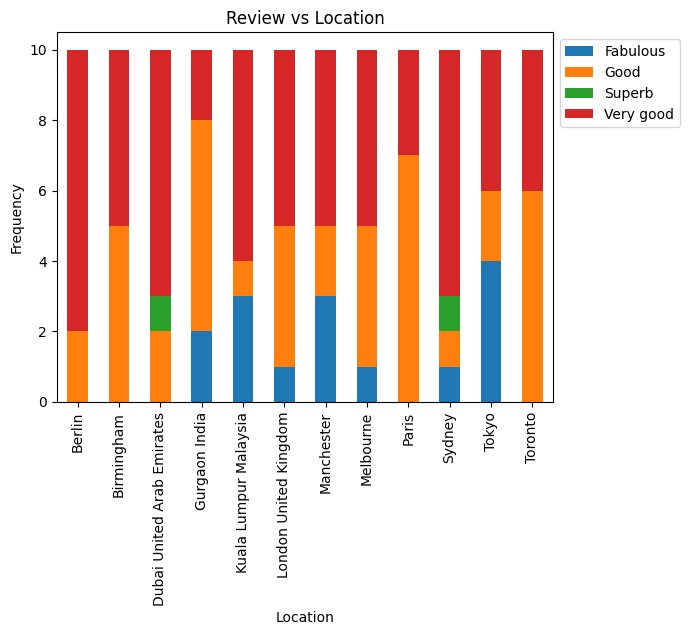

In [14]:
# Reviews as per the Locations

# Create a bar plot
plt.figure(figsize=(20, 20))
resulting_df.groupby(['Location', 'User_Ratings']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Review vs Location')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

From the above bar plot, the descending order of Reviews are as follows:
Fabulous being the least, Good, Superb, Very good being the best.

Hence, from the plot, it is evident that Berlin has the best set of hotels, while Gurgaon has bad impression on Users

<Figure size 2000x2000 with 0 Axes>

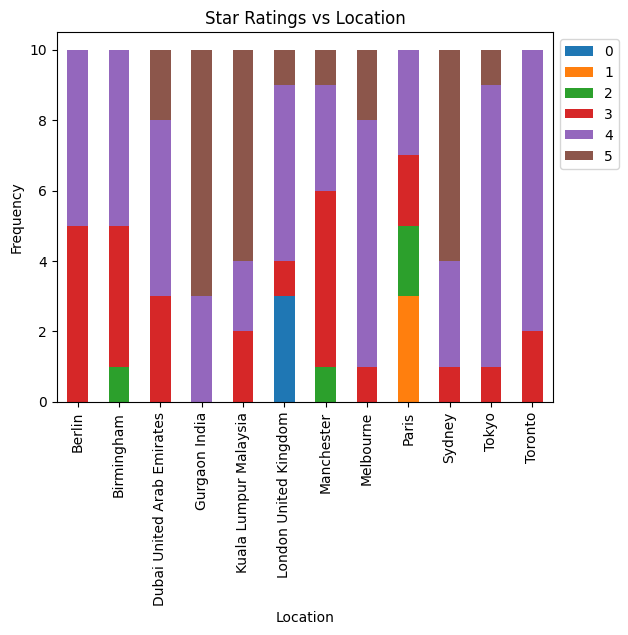

In [15]:
# Star Ratings as per the Locations

# Create a bar plot
plt.figure(figsize=(20, 20))
resulting_df.groupby(['Location', 'Star_Ratings']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Star Ratings vs Location')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

From the above bar plot, the descending order of Star Ratings are as follows:
5 being the most luxurious, then 4, 3, 2, 1, and 0.

Hence, from the plot, it is evident that Gurgaon has the best set of luxurious hotels, while London, United Kingdom has few 0 star ratings, due to which it turns out to be a location, where luxury hotels are less in number

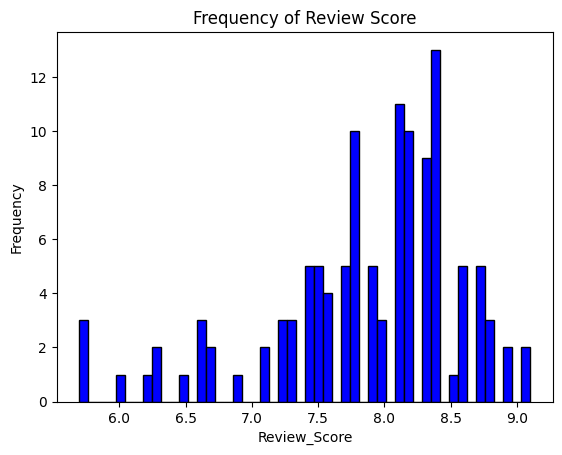

In [16]:
# Plotting the frequency plot(histogram) to find the distribution of Review_Score

# Create a histogram
plt.hist(resulting_df['Review_Score'], bins=50, color='blue', edgecolor='black')
plt.xlabel('Review_Score')
plt.ylabel('Frequency')
plt.title('Frequency of Review Score')
plt.show()

From the plot above, it is evident that most of the hotels are given Review Score in between 8 to 8.5, whereas least amount of hotels are having Review Score in between 6 to 6.5. Also, there are nearly 3 hotels, which have less than 6 Review Score

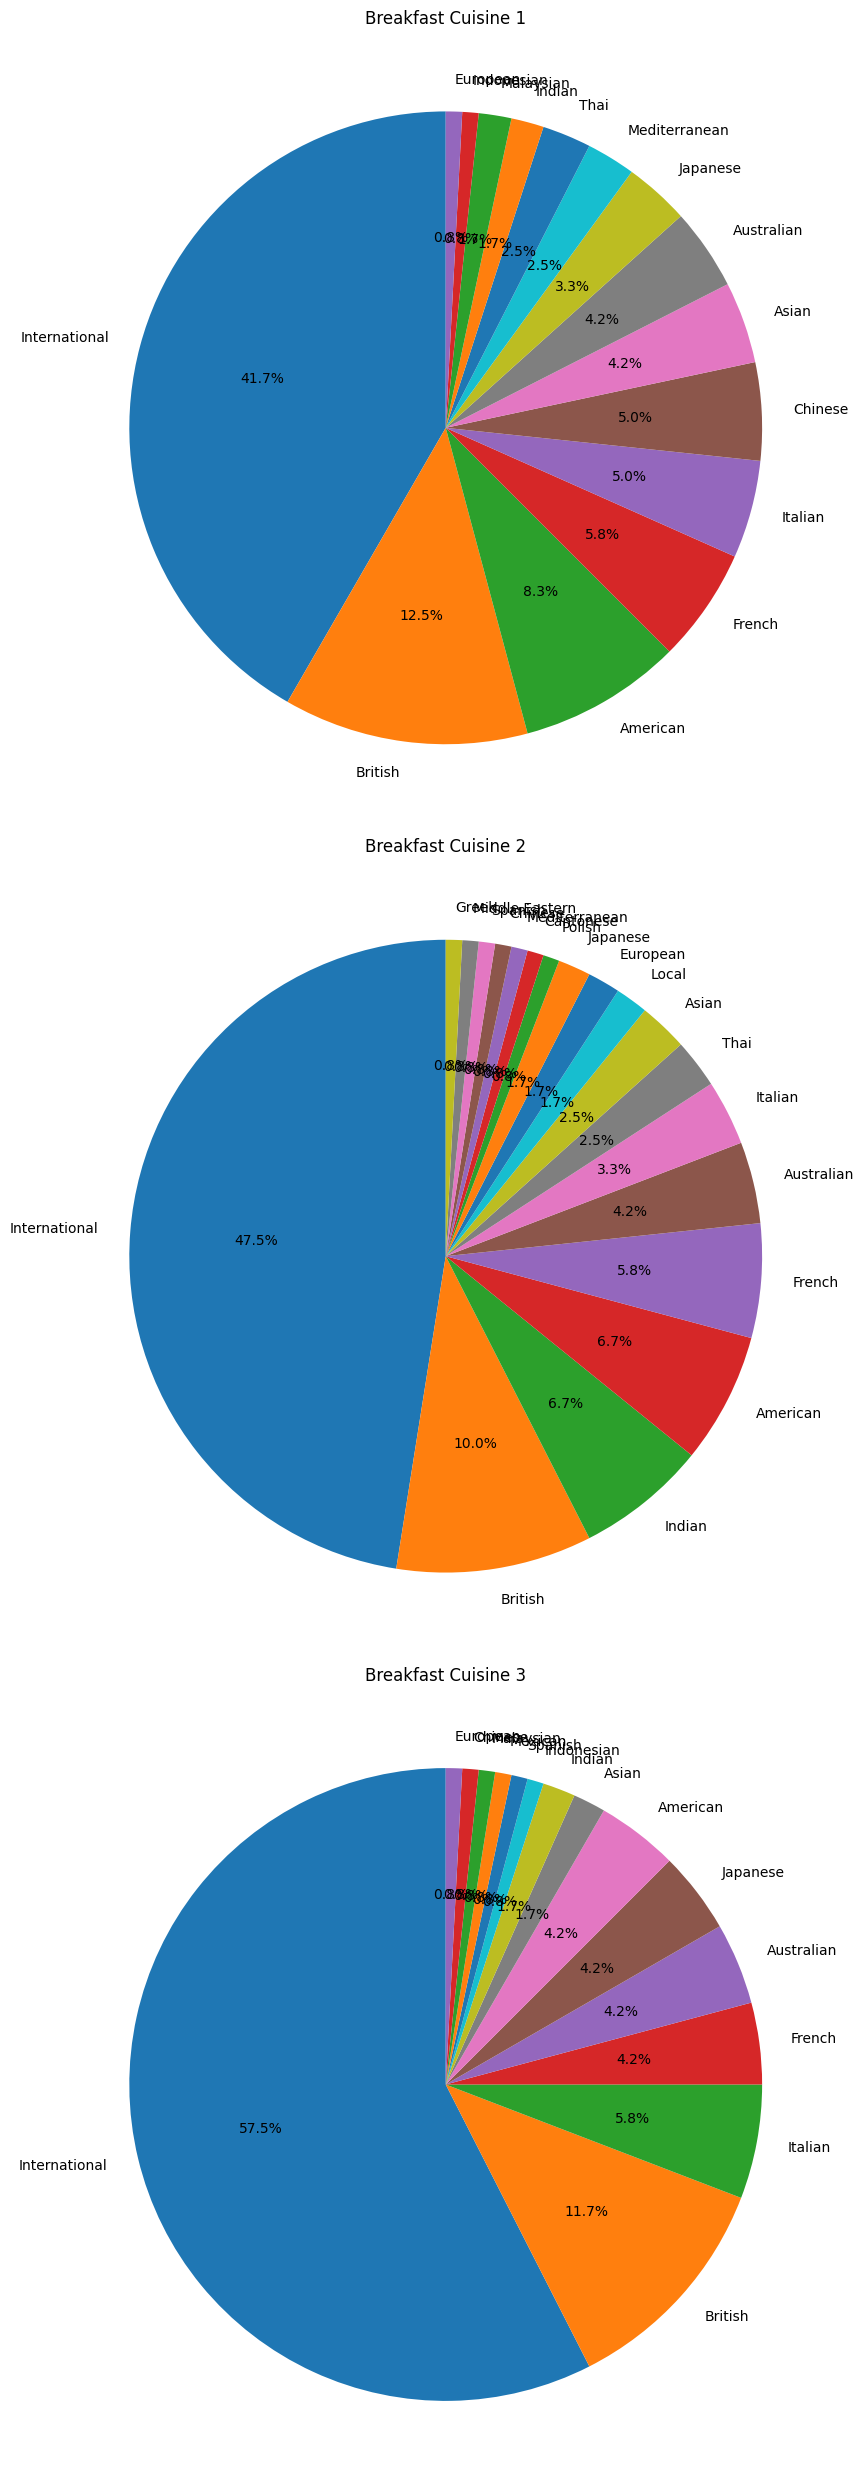

In [17]:
# Understanding the distribution of Breakfast_Cuisine_1, Breakfast_Cuisine_2 and Breakfast_Cuisine_3

# Count frequency of each food type

food_counts_1 = resulting_df['Breakfast_Cuisine_1'].value_counts()
food_counts_2 = resulting_df['Breakfast_Cuisine_2'].value_counts()
food_counts_3 = resulting_df['Breakfast_Cuisine_3'].value_counts()

# Subplots with three pie charts
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(50, 25))

# Plot the first pie chart
axes[0].pie(food_counts_1, labels=food_counts_1.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Breakfast Cuisine 1')

# Plot the second pie chart
axes[1].pie(food_counts_2, labels=food_counts_2.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Breakfast Cuisine 2')

# Plot the third pie chart
axes[2].pie(food_counts_3, labels=food_counts_3.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Breakfast Cuisine 3')

plt.tight_layout()
plt.show()

From the three pie charts above, it is evident that "International" Breakfast Cuisine is the highly served Cuisine in Breakfast at different hotels

In [18]:
# Correlation heatmap

corrs = resulting_df.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

In [14]:
# Dropping S_No_x as it is not convenient for model building as it does not depict any meaningful presence
resulting_df.drop(['S_No_x'], axis = 1, inplace = True)

In [15]:
# Making a copy of the resulting_df for building the second model

resulting_df_2 = resulting_df.copy()
resulting_df_2.head()

,Hotel_Name_x,Number_of_Reviews,User_Ratings,Star_Ratings,Review_Score,Location,Free_Wifi,Family_Rooms,Non_smoking_Rooms,Restaurant,Bar,Heating,Lift,Breakfast_Cuisine_1,Breakfast_Cuisine_2,Breakfast_Cuisine_3,Room_Type,Single_Bed,Double_Bed,Prices_in_INR
0,Five Jumeirah Village,"38,428 reviews",Superb,5,9.1,Dubai United Arab Emirates,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Italian,Indian,Indonesian,King | Queen | Deluxe | Suite,Yes,Yes,11180
1,Premier Inn Dubai International Airport,"16,064 reviews",Very good,3,8.3,Dubai United Arab Emirates,Yes,Yes,Yes,Yes,Yes,No,Yes,International,International,International,King | Queen | Deluxe | Suite,Yes,Yes,5815
2,"Holiday Inn Express Dubai Airport, an IHG Hotel","16,426 reviews",Good,3,7.8,Dubai United Arab Emirates,Yes,Yes,Yes,Yes,Yes,No,Yes,International,International,International,King | Queen | Deluxe | Suite,Yes,Yes,6725
3,TRYP by Wyndham Dubai,"16,885 reviews",Very good,4,8.4,Dubai United Arab Emirates,Yes,Yes,Yes,Yes,Yes,No,Yes,International,Greek,Spanish,King | Queen | Deluxe | Suite,Yes,Yes,11992
4,Wyndham Dubai Marina,"13,175 reviews",Very good,4,8.2,Dubai United Arab Emirates,Yes,Yes,Yes,Yes,Yes,No,Yes,Italian,International,International,King | Queen | Deluxe | Suite,Yes,Yes,17911


# Model Building - 1
## Predicting Price (Price_In_INR)

In [19]:
resulting_df.dtypes

Hotel_Name_x            object
Number_of_Reviews       object
User_Ratings            object
Star_Ratings             int64
Review_Score           float64
Location                object
Free_Wifi               object
Family_Rooms            object
Non_smoking_Rooms       object
Restaurant              object
Bar                     object
Heating                 object
Lift                    object
Breakfast_Cuisine_1     object
Breakfast_Cuisine_2     object
Breakfast_Cuisine_3     object
Room_Type               object
Single_Bed              object
Double_Bed              object
Prices_in_INR            int64
dtype: object

In [20]:
# Convert categorical columns into dummy variables

resulting_df = pd.get_dummies(resulting_df, columns=['Hotel_Name_x', 'Number_of_Reviews', 'User_Ratings', 'Location', 'Free_Wifi',
                                                     'Family_Rooms', 'Non_smoking_Rooms', 'Restaurant', 'Bar', 'Heating', 'Lift',
                                                     'Breakfast_Cuisine_1', 'Breakfast_Cuisine_2', 'Breakfast_Cuisine_3', 'Room_Type',
                                                     'Single_Bed', 'Double_Bed'], drop_first=True)

In [36]:
# Extracting the independent and dependent variables

X = resulting_df.drop(columns=['Prices_in_INR'])
y = resulting_df['Prices_in_INR']

In [61]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [62]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [63]:
# Predictions

y_pred = regressor.predict(X_test)
y_pred

array([ 8796.79288624, 12784.22505864,  8824.84774298,  9468.53220743,
        5344.38464969,  8432.73515249, 12681.54254188, 10057.78203222,
        4245.27783828, 17558.12645977, 19314.66594697,  6844.46766406,
        7744.54616495, 13157.00056509,  5113.04192875,  5460.52993561,
       12894.87596883, 16102.57106615, 10206.79076357, 13587.42721527,
        8637.59311236,  8048.29389271,  2614.51722683, 12897.42748146])

In [64]:
# Evaluation metrics for determining the model performance

print("Mean Squarerd Error :", mean_squared_error(y_test, y_pred))
print()
print("R Sqaure :", r2_score(y_test, y_pred))
print()
print("Model Intercept :", regressor.intercept_)
print()
print("Explained Variance Score :", explained_variance_score(y_test, y_pred))
print()
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))
print()
print("Median Absolute Error :", median_absolute_error(y_test, y_pred))

Mean Squarerd Error : 10589014.353375465

R Sqaure : 0.6788607356648422

Model Intercept : -15701.967039857003

Explained Variance Score : 0.680977119909124

Mean Absolute Error : 2413.3201238652973

Median Absolute Error : 1816.2017379172985


After continuous hypertuning the model parameters, the final parameters which give this accuracy, turns out to be the best performing model. Accuracy is equivalent to R Square when building Linear Regression model, which is 0.678 or 67.88% accurate predictions.

# Model Building - 2
## Predicting Review Score - However in my dataset, Review Score data is present inside User_Ratings

In [16]:
# Will be using the resulting_df_2 dataframe to build this model

# Convert categorical columns into dummy variables

resulting_df = pd.get_dummies(resulting_df, columns=['Hotel_Name_x', 'Number_of_Reviews', 'Location', 'Free_Wifi',
                                                     'Family_Rooms', 'Non_smoking_Rooms', 'Restaurant', 'Bar', 'Heating', 'Lift',
                                                     'Breakfast_Cuisine_1', 'Breakfast_Cuisine_2', 'Breakfast_Cuisine_3', 'Room_Type',
                                                     'Single_Bed', 'Double_Bed'], drop_first=True)

In [17]:
# Extracting the independent and dependent variables

X = resulting_df.drop(columns=['User_Ratings'])
y = resulting_df['User_Ratings']

In [41]:
# Spliting into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression(solver='newton-cg', C=100, penalty='l2', class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(C=100, class_weight='balanced', solver='newton-cg')

In [42]:
# Predictions

y_pred = lr.predict(X_test)
y_pred

array(['Good', 'Fabulous', 'Very good', 'Good', 'Very good', 'Very good',
       'Very good', 'Good', 'Good', 'Fabulous', 'Fabulous', 'Very good',
       'Very good', 'Fabulous', 'Very good', 'Good', 'Very good',
       'Fabulous', 'Very good', 'Very good', 'Very good', 'Good',
       'Very good', 'Very good'], dtype=object)

In [43]:
# Evaluation Metrics

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: \n", accuracy)
print()
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", confusion)

Accuracy: 
 0.625

Confusion Matrix: 
 [[4 0 0 2]
 [0 3 0 3]
 [1 0 0 0]
 [0 3 0 8]]


After applying different classification models, ended up getting Logistic Regression as the best model for the data. With the best hyperparameters, I got the accuracy of 0.625 or 62.5%